In [ ]:
!pip install datasets pandas numpy torch transformers librosa

In [ ]:
!pip install opencv-python numpy matplotlib pandas

✅ Total MRI images found: 40384
Loading: /kaggle/input/alzheimers-data/OriginalDataset/ModerateDemented/moderateDem40.jpg


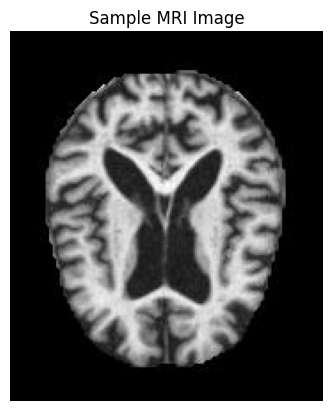

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the dataset
dataset_path = "/kaggle/input/alzheimers-data"

# Recursively find all image files in subdirectories
mri_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            mri_files.append(os.path.join(root, file))

# Check if images are found
if len(mri_files) == 0:
    print("❌ No images found in the dataset path!")
else:
    print(f"✅ Total MRI images found: {len(mri_files)}")

    # Load and display the first image
    sample_image_path = mri_files[0]
    print(f"Loading: {sample_image_path}")
    
    image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("❌ Error: Image could not be loaded.")
    else:
        plt.imshow(image, cmap="gray")
        plt.title("Sample MRI Image")
        plt.axis("off")
        plt.show()

🔍 Checking: /kaggle/input/alzheimers-data/OriginalDataset

📊 **Image Distribution Per Category:**
MildDemented: 9856 images
ModerateDemented: 6528 images
NonDemented: 12800 images
VeryMildDemented: 11200 images

✅ **Total MRI Images Processed:** 40384

✅ **No corrupt images found!**


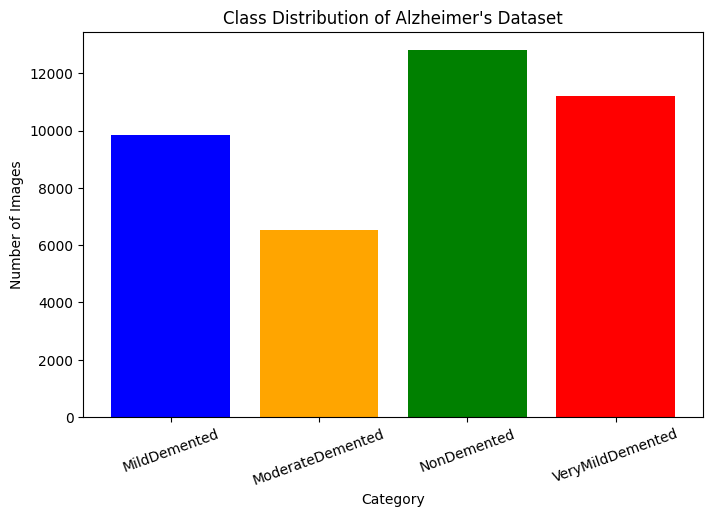

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

# Define dataset path
dataset_path = "/kaggle/input/alzheimers-data"

# Subfolders for each class
categories = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

# Initialize dictionary to count images per class
image_counts = defaultdict(int)

# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return False
        return True
    except Exception as e:
        return False

# Iterate through both 'AugmentedAlzheimerDataset' and 'OriginalDataset'
corrupt_images = []
total_images = 0

for dataset_type in ["AugmentedAlzheimerDataset", "OriginalDataset"]:
    dataset_dir = os.path.join(dataset_path, dataset_type)
    
    if not os.path.exists(dataset_dir):
        print(f"❌ Folder missing: {dataset_dir}")
        continue

    print(f"🔍 Checking: {dataset_dir}")

    for category in categories:
        category_path = os.path.join(dataset_dir, category)

        if not os.path.exists(category_path):
            print(f"⚠️ Missing category folder: {category_path}")
            continue

        # List all image files
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        image_counts[category] += len(image_files)
        total_images += len(image_files)

        # Check for corrupt images
        for img_file in image_files:
            img_path = os.path.join(category_path, img_file)
            if not is_valid_image(img_path):
                corrupt_images.append(img_path)

# Print the image count per category
print("\n📊 **Image Distribution Per Category:**")
for category, count in image_counts.items():
    print(f"{category}: {count} images")

print(f"\n✅ **Total MRI Images Processed:** {total_images}")

# Display corrupted images
if corrupt_images:
    print(f"\n⚠️ **Corrupt Images Found ({len(corrupt_images)}):**")
    for img in corrupt_images[:5]:  # Show first 5 corrupt images
        print(img)
else:
    print("\n✅ **No corrupt images found!**")

# Plot class distribution
plt.figure(figsize=(8, 5))
plt.bar(image_counts.keys(), image_counts.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution of Alzheimer's Dataset")
plt.xticks(rotation=20)
plt.show()


In [5]:
import os

# Define your base paths
paths = {
    "Augmented": "/kaggle/input/alzheimers-data/AugmentedAlzheimerDataset",
    "Original": "/kaggle/input/alzheimers-data/OriginalDataset"
}

# Function to count images per category in a folder
def count_images(base_path):
    print(f"🔍 Checking: {base_path}")
    total = 0
    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):
            num_files = len([
                file for file in os.listdir(category_path)
                if os.path.isfile(os.path.join(category_path, file))
            ])
            print(f"{category}: {num_files} images")
            total += num_files
    print(f"✅ Total images in {base_path.split('/')[-1]}: {total}\n")

# Loop through both folders and count images
for name, path in paths.items():
    count_images(path)


🔍 Checking: /kaggle/input/alzheimers-data/AugmentedAlzheimerDataset
ModerateDemented: 6464 images
NonDemented: 9600 images
VeryMildDemented: 8960 images
MildDemented: 8960 images
✅ Total images in AugmentedAlzheimerDataset: 33984

🔍 Checking: /kaggle/input/alzheimers-data/OriginalDataset
ModerateDemented: 64 images
NonDemented: 3200 images
VeryMildDemented: 2240 images
MildDemented: 896 images
✅ Total images in OriginalDataset: 6400



In [6]:
import shutil

# Paths
source_root = "/kaggle/input/alzheimers-data/AugmentedAlzheimerDataset"
target_root = "/kaggle/working/BalancedAlzheimerDataset"
classes_to_copy = ["NonDemented", "VeryMildDemented", "MildDemented"]

# Copy other class folders
for class_name in classes_to_copy:
    src = os.path.join(source_root, class_name)
    dst = os.path.join(target_root, class_name)
    shutil.copytree(src, dst)
    print(f"✅ Copied {class_name}")


✅ Copied NonDemented
✅ Copied VeryMildDemented
✅ Copied MildDemented


In [7]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# Path to original ModerateDemented images
input_dir = "/kaggle/input/alzheimers-data/AugmentedAlzheimerDataset/ModerateDemented"
output_dir = "/kaggle/working/BalancedAlzheimerDataset/ModerateDemented"
os.makedirs(output_dir, exist_ok=True)

# Load existing files
existing_images = os.listdir(input_dir)
target_count = 9000
current_count = len(existing_images)
generated = 0

# Augmentations pipeline
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.GaussNoise(p=0.2)
])

print("⏳ Augmenting ModerateDemented class...")

while current_count + generated < target_count:
    for file in tqdm(existing_images):
        if current_count + generated >= target_count:
            break
        img_path = os.path.join(input_dir, file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply augmentation
        augmented = augment(image=image)['image']
        output_file = f"aug_{generated}_{file}"
        output_path = os.path.join(output_dir, output_file)

        # Save image
        cv2.imwrite(output_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
        generated += 1

print(f"✅ Augmented {generated} new images. Final ModerateDemented count: {current_count + generated}")

/usr/local/lib/python3.10/dist-packages/albumentations/check_version.py:51: UserWarning: Error fetching version info <urlopen error [Errno -3] Temporary failure in name resolution>
  data = fetch_version_info()


⏳ Augmenting ModerateDemented class...


 39%|███▉      | 2536/6464 [00:07<00:11, 331.08it/s]

✅ Augmented 2536 new images. Final ModerateDemented count: 9000


In [8]:

# Paths
original_dir = "/kaggle/input/alzheimers-data/AugmentedAlzheimerDataset/ModerateDemented"
target_dir = "/kaggle/working/BalancedAlzheimerDataset/ModerateDemented"

# Copy original ModerateDemented images into BalancedAlzheimerDataset
for filename in os.listdir(original_dir):
    src_path = os.path.join(original_dir, filename)
    dst_path = os.path.join(target_dir, filename)
    shutil.copy(src_path, dst_path)

print("✅ Copied original 6464 ModerateDemented images into Balanced dataset folder.")


✅ Copied original 6464 ModerateDemented images into Balanced dataset folder.


In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

data_dir = "/kaggle/working/BalancedAlzheimerDataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])  # ImageNet stats for pretrained models
])

dataset = datasets.ImageFolder(data_dir, transform=transform)

# Splitting dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

class_names = dataset.classes
print("✅ Classes:", class_names)


✅ Classes: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [12]:
import torch
from torchvision import models

model = models.resnet18(weights=None)  # Initialize without downloading
model.load_state_dict(torch.load("/kaggle/input/resnet18-weights/resnet18-f37072fd.pth", weights_only=True))
model.fc = torch.nn.Linear(model.fc.in_features, 4)  # Assuming 4 classes
model = model.to(device)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [16]:
Loss = []
avg_val_loss = []
train_acc = []
val_acc = []

num_epochs=10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss
    epoch_acc = correct / total
    Loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    avg_val_loss.append(val_loss / len(val_loader))
    val_acc.append(val_correct / val_total)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {epoch_loss:.4f} | Train Accuracy: {epoch_acc:.4f}")
    print(f"Validation Loss: {avg_val_loss[-1]:.4f} | Validation Accuracy: {val_acc[-1]:.4f}")

Epoch 1/10 | Loss: 398.5223 | Train Accuracy: 0.7841
Validation Loss: 0.4211 | Validation Accuracy: 0.8450
Epoch 3/10 | Loss: 85.9057 | Train Accuracy: 0.9613
Validation Loss: 0.1204 | Validation Accuracy: 0.9591
Epoch 4/10 | Loss: 67.1643 | Train Accuracy: 0.9697
Validation Loss: 0.1186 | Validation Accuracy: 0.9527
Epoch 5/10 | Loss: 44.1152 | Train Accuracy: 0.9795
Validation Loss: 0.1630 | Validation Accuracy: 0.9483
Epoch 6/10 | Loss: 40.2904 | Train Accuracy: 0.9827
Validation Loss: 0.1254 | Validation Accuracy: 0.9582
Epoch 7/10 | Loss: 34.2400 | Train Accuracy: 0.9847
Validation Loss: 0.0848 | Validation Accuracy: 0.9715
Epoch 8/10 | Loss: 32.7156 | Train Accuracy: 0.9861
Validation Loss: 0.3607 | Validation Accuracy: 0.9129
Epoch 9/10 | Loss: 24.8657 | Train Accuracy: 0.9891
Validation Loss: 0.1217 | Validation Accuracy: 0.9587
Epoch 10/10 | Loss: 27.5827 | Train Accuracy: 0.9885
Validation Loss: 0.0630 | Validation Accuracy: 0.9785


In [17]:
model_path = "resnet18_alzheimer_model.pth"
torch.save(model.state_dict(), model_path)
print(f"✅ Model saved as {model_path}")

✅ Model saved as resnet18_alzheimer_model.pth


In [18]:
from IPython.display import FileLink
FileLink(r'resnet18_alzheimer_model.pth')

/kaggle/working/resnet18_alzheimer_model.pth

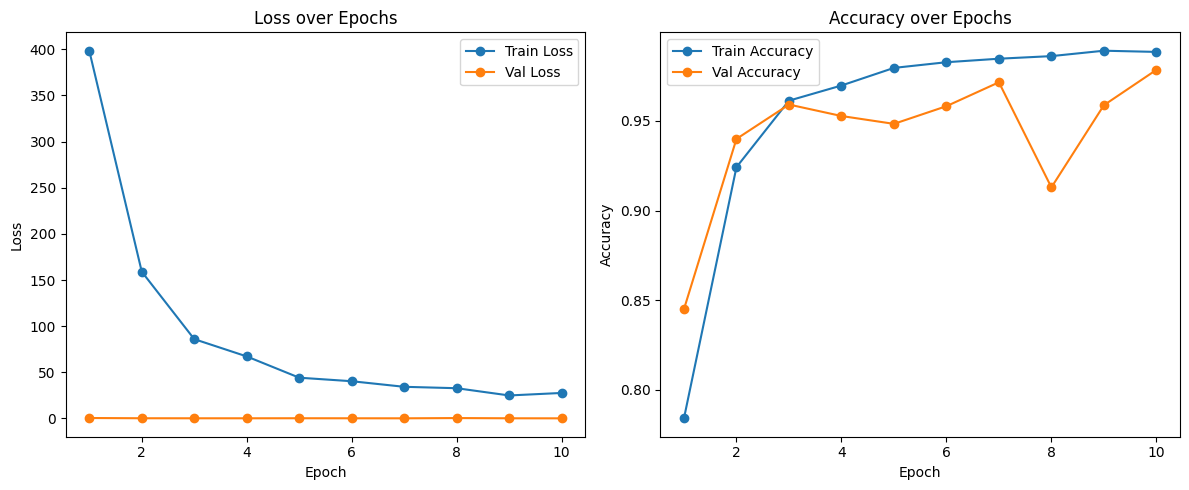

In [20]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import os

# Plot Training and Validation Accuracy & Loss
def plot_metrics(train_loss, val_loss, train_acc, val_acc):
    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, val_loss, label='Val Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Val Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_metrics(Loss, avg_val_loss, train_acc, val_acc)

In [21]:
model.eval()
test_correct = 0
test_total = 0
test_loss = 0.0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

avg_test_loss = test_loss / len(test_loader)
test_accuracy = test_correct / test_total

print(f"\n🧪 Test Loss: {avg_test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")


🧪 Test Loss: 0.0744 | Test Accuracy: 0.9737


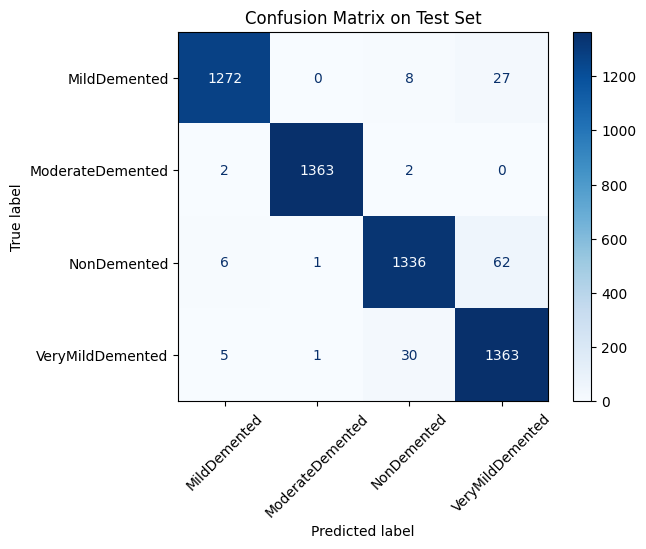

In [24]:
cm = confusion_matrix(all_labels, all_preds)
labels_list = test_ds.dataset.classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.show()